In [14]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem, Draw
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors

In [2]:
data = pd.read_csv('../data/binding_site_training_data.csv')

In [3]:
data.head()

,SMILES,name,cat0,cat1,cat2,cat3
0,CC(=O)c(c1)c(=O)oc(c12)cccc2,3-Acetylcoumarin,0,1,0,0
1,O=C(O)C(C)c(c1C(=O)O)oc(c1C)CCC,3-Carboxy-4-methyl-5-propyl-2-furan-propionic ...,0,1,0,0
2,c1cccc(c12)OCCC2O,4-Chromanol,0,1,0,0
3,c1cccc(c12)oc(=O)cc2O,4-Hydroxycoumarin,0,1,0,0
4,O=C(O)Cc1cc(=O)oc(c12)cc(cc2)Nc3ccccc3,7-Anilinocoumarin-4-acetic acid,1,0,0,0


## Balance analysis

In [4]:
data.describe()

,cat0,cat1,cat2,cat3
count,124.000000,124.000000,124.000000,124.000000
mean,0.532258,0.193548,0.258065,0.016129
std,0.500983,0.396682,0.439345,0.126483
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000


In [5]:
data.sum()

SMILES    CC(=O)c(c1)c(=O)oc(c12)cccc2O=C(O)C(C)c(c1C(=O...
name      3-Acetylcoumarin3-Carboxy-4-methyl-5-propyl-2-...
cat0                                                     66
cat1                                                     24
cat2                                                     32
cat3                                                      2
dtype: object

In [6]:
data[data.cat3 == 1]

,SMILES,name,cat0,cat1,cat2,cat3
28,Nc(n1)scc1C(=NOC)C(=O)N[C@@H]2C(=O)N([C@@H]23)...,Ceftriaxone,0,0,0,1
54,C1COC(CC)(CC(=O)O)c(c1c23)[nH]c2c(CC)ccc3,Etodolac,0,0,0,1


## Site 1 molecules

In [7]:
site1_data = data[data.cat1 == 1]

In [8]:
site1_data.head()

,SMILES,name,cat0,cat1,cat2,cat3
0,CC(=O)c(c1)c(=O)oc(c12)cccc2,3-Acetylcoumarin,0,1,0,0
1,O=C(O)C(C)c(c1C(=O)O)oc(c1C)CCC,3-Carboxy-4-methyl-5-propyl-2-furan-propionic ...,0,1,0,0
2,c1cccc(c12)OCCC2O,4-Chromanol,0,1,0,0
3,c1cccc(c12)oc(=O)cc2O,4-Hydroxycoumarin,0,1,0,0
5,c1cc([N+]([O-])=O)ccc1C(CC(=O)C)c(c2=O)c(O)oc(...,Acenocoumarin,0,1,0,0


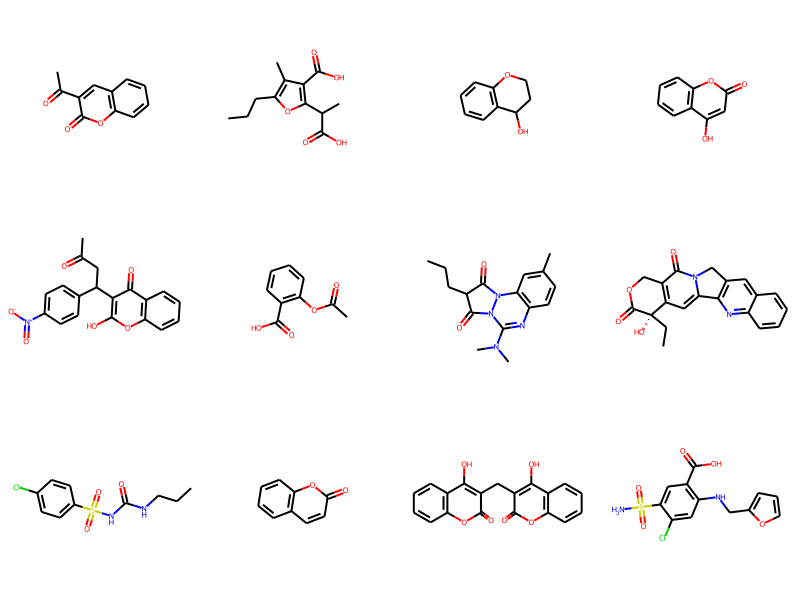

In [52]:
from IPython.display import SVG
mols = [Chem.MolFromSmiles(sm) for sm in site1_data['SMILES']]

img=Draw.MolsToGridImage(mols[:12],molsPerRow=4,subImgSize=(200,200))
img

## Site2 data

In [23]:
site2_data = data[data.cat2 == 1]

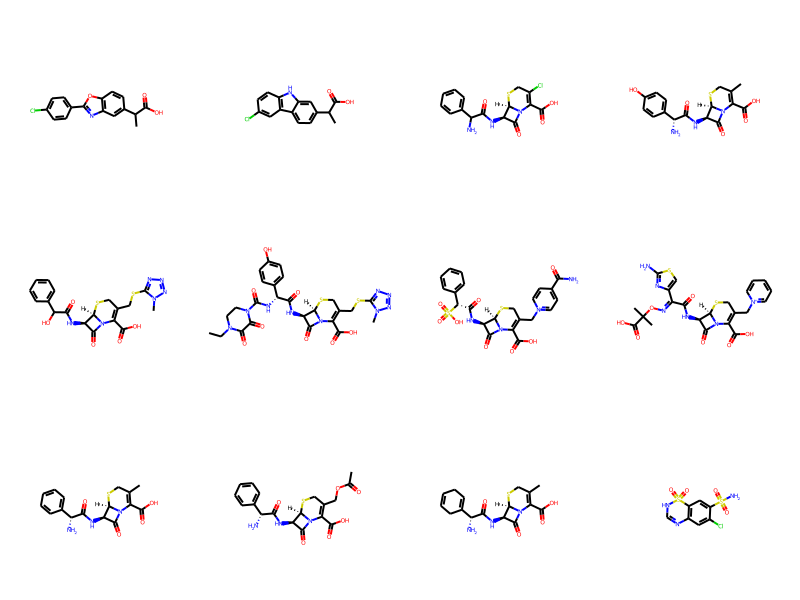

In [53]:
mols = [Chem.MolFromSmiles(sm) for sm in site2_data['SMILES']]

img=Draw.MolsToGridImage(mols[:12],molsPerRow=4,subImgSize=(200,200))
img

## Site0 data

In [54]:
site0_data = data[data.cat0 == 1]

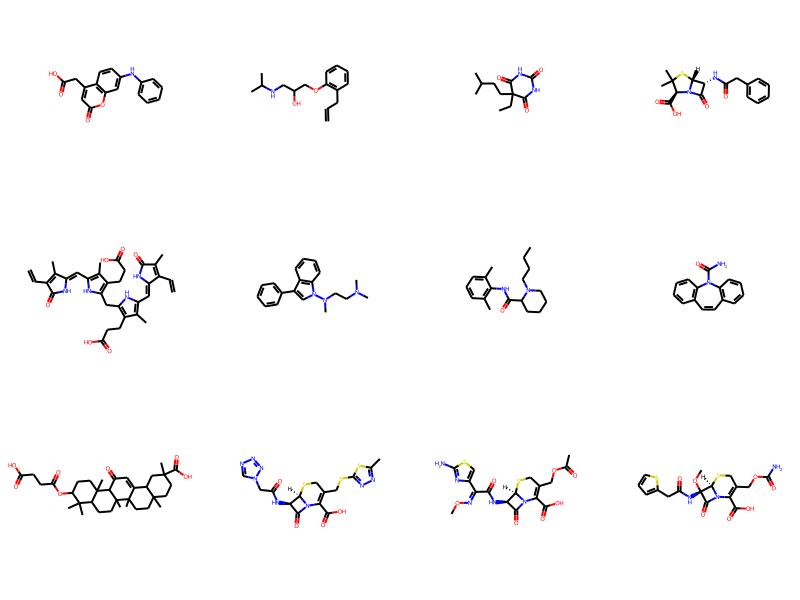

In [55]:
mols = [Chem.MolFromSmiles(sm) for sm in site0_data['SMILES']]

img=Draw.MolsToGridImage(mols[:12],molsPerRow=4,subImgSize=(200,200))
img

## Site3 data

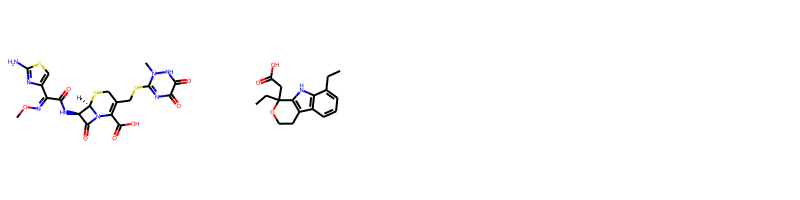

In [56]:
mols = [Chem.MolFromSmiles(sm) for sm in data[data.cat3 == 1]['SMILES']]

img=Draw.MolsToGridImage(mols[:12],molsPerRow=4,subImgSize=(200,200))
img

## New dataset creating

In [63]:
new_data = data[['SMILES']]

In [64]:
new_data

,SMILES
0,CC(=O)c(c1)c(=O)oc(c12)cccc2
1,O=C(O)C(C)c(c1C(=O)O)oc(c1C)CCC
2,c1cccc(c12)OCCC2O
3,c1cccc(c12)oc(=O)cc2O
4,O=C(O)Cc1cc(=O)oc(c12)cc(cc2)Nc3ccccc3
...,...
119,O=C(O)C(N)Cc1c[nH]c(c12)cccc2
120,Cn1c(=O)n(C)c(=O)cc1NCCCN2CCN(CC2)c3c(OC)cccc3
121,COc(cc1)c(OC)cc1C(C#N)(C(C)C)CCCN(C)CCc2cc(OC)...
122,c1ccccc1C(CC(=O)C)c(c2O)c(=O)oc(c23)cccc3


In [78]:
activity = pd.Series([int(not x) for x in data.cat0])

In [79]:
new_data.active = activity

/home/lizzka239/anaconda3/envs/rdkit/lib/python3.9/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [80]:
new_data

,SMILES,active
0,CC(=O)c(c1)c(=O)oc(c12)cccc2,1
1,O=C(O)C(C)c(c1C(=O)O)oc(c1C)CCC,1
2,c1cccc(c12)OCCC2O,1
3,c1cccc(c12)oc(=O)cc2O,1
4,O=C(O)Cc1cc(=O)oc(c12)cc(cc2)Nc3ccccc3,0
...,...,...
119,O=C(O)C(N)Cc1c[nH]c(c12)cccc2,1
120,Cn1c(=O)n(C)c(=O)cc1NCCCN2CCN(CC2)c3c(OC)cccc3,1
121,COc(cc1)c(OC)cc1C(C#N)(C(C)C)CCCN(C)CCc2cc(OC)...,0
122,c1ccccc1C(CC(=O)C)c(c2O)c(=O)oc(c23)cccc3,1


In [82]:
new_data.active.sum()

58

In [83]:
new_data.to_csv('../data/preprocessed.csv', index=False)